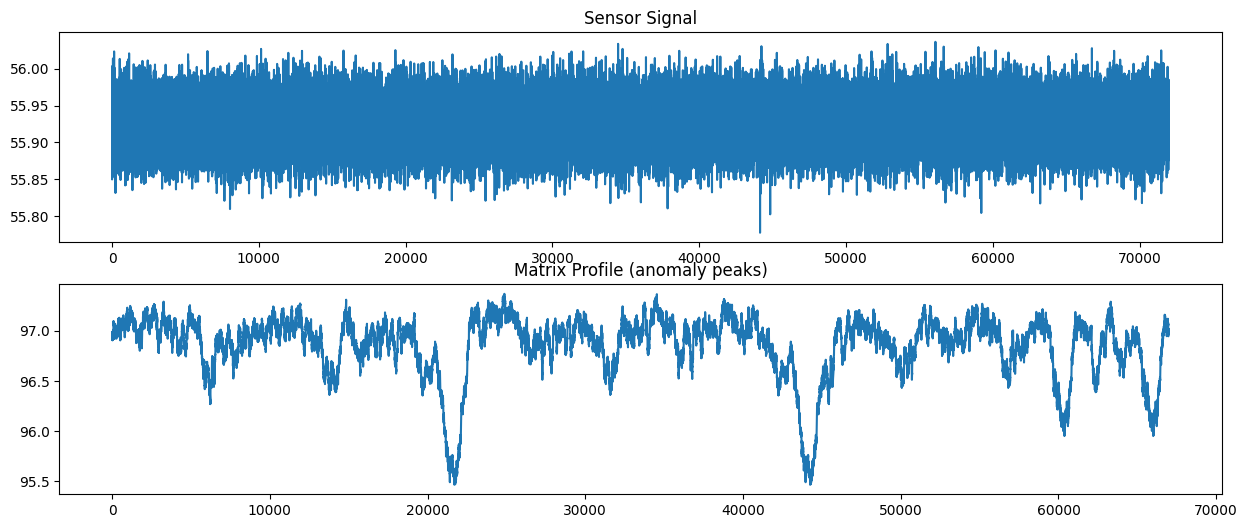

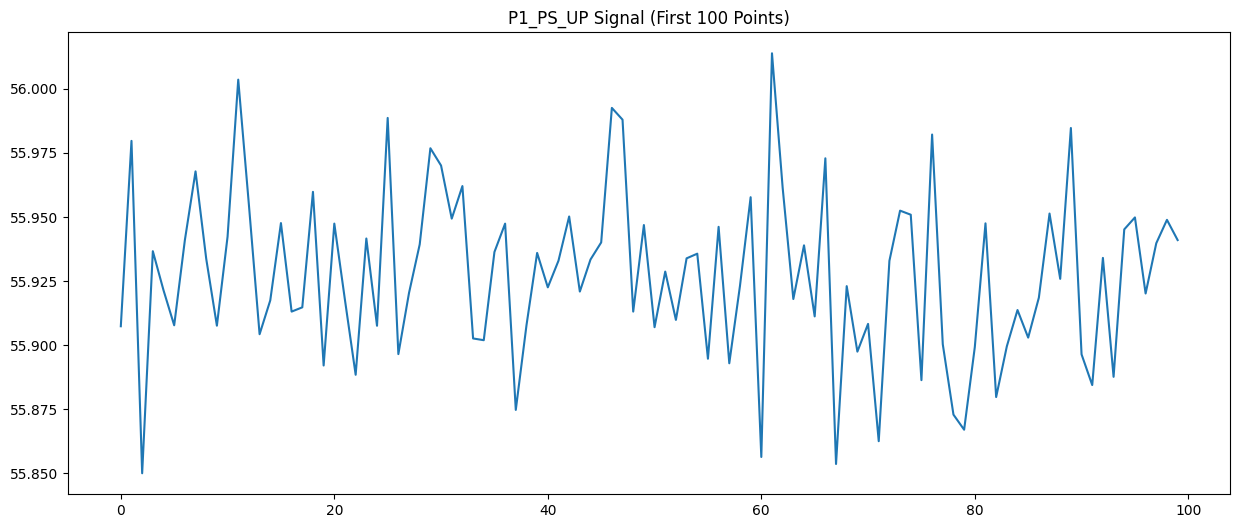

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
import numpy as np

# Load your data (example: sensor column)
df = pd.read_csv(r'G:\GlitchDetect\data\100_hrs_simulated.csv')

# Choose one sensor column
signal = df["P1_PS_UP"].dropna().values

# Window size: how many points define a "pattern" (tune this)
m = 5000  

# Compute Matrix Profile
mp = stumpy.stump(signal, m)

# mp[:,0] is the matrix profile (distance), mp[:,1] is the index of nearest neighbor
matrix_profile = mp[:, 0]

# Plot signal & matrix profile
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(signal)
#plot best fit line polynomial
plt.plot(np.mean(signal), color='red')
plt.title("Sensor Signal")

plt.subplot(2,1,2)
plt.plot(matrix_profile)
plt.title("Matrix Profile (anomaly peaks)")
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df['P1_PS_UP'][:100])
plt.title("P1_PS_UP Signal (First 100 Points)")
plt.show()

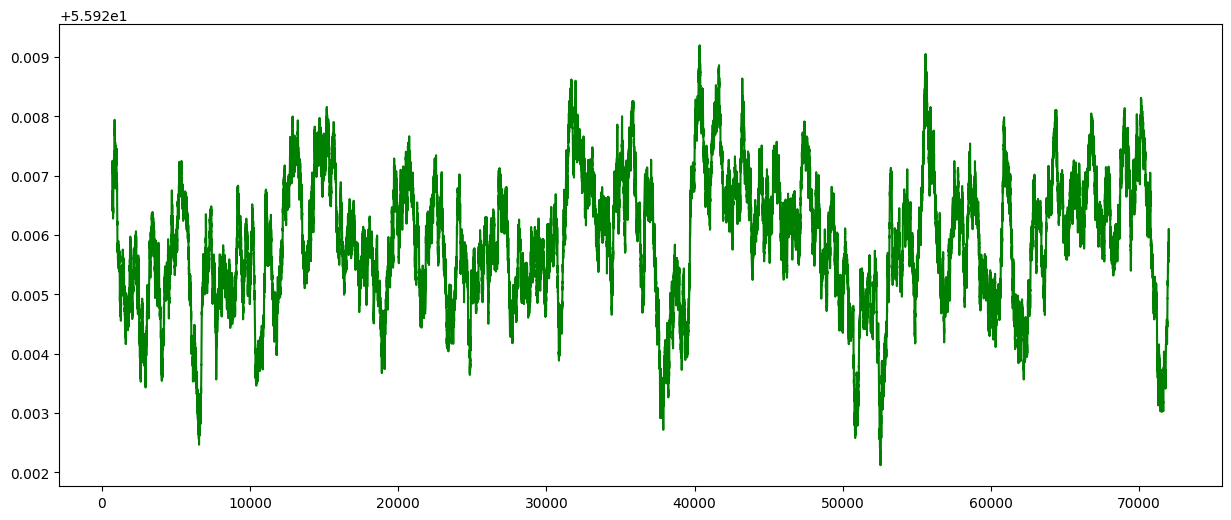

In [20]:
# rolling average over sqrt size of data
window_size = 700
rolling_mean = pd.Series(signal).rolling(window=window_size).mean()
plt.figure(figsize=(15,6))
plt.plot(rolling_mean, color='green')